<div style="float:left">
    <h1 style="width:600px">Workshop 10: Analysis workflow</h1>
    <h3 style="width:600px">CASA0006: Data Science for Spatial Systems</h3>
    <h3 style="width:600px">Author: Huanfa Chen</h3>
</div>
<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>

In this workshop, you will build a solution to predict house prices based on house characteristics in [Ames](https://en.wikipedia.org/wiki/Ames,_Iowa), Iowa, US. 

The Ames Housing dataset was compiled by Dean De Cock for use in data science education and is available on [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). It's an excellent alternative for data scientists looking for a modernised and expanded version of the often cited Boston Housing dataset (remember that we have used the Boston housing data in previous workshops). This [dataset](https://raw.githubusercontent.com/huanfachen/Spatial_Data_Science/main/Dataset/Ames_house_price_data.csv) and its [description](https://github.com/huanfachen/Spatial_Data_Science/blob/main/Dataset/metadata_Ames_house_price_data.txt) have been uploaded to Github.

Predicting the house price can be formulated as a regression task. First, we will use linear regression to tackle this problem, and then use random forest, trying to improve the model performance. The objectives in this workshop are:

1. Using linear regression and random forest to predict the Ames housing price.
2. Conducting the bias-variance analysis for the random forest regression.
3. Performing hyperparameter tuning and model optimisation for the random forest model.

## Step 1: Getting the data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/huanfachen/Spatial_Data_Science/main/Dataset/Ames_house_price_data.csv')

In [3]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Here, your task is to predict ```SalePrice``` using all other house attributes.

## Step 2: Investigating and cleaning the data (using pandas)

Check types of variables

In [5]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object

Look at the histogram of the target variable 'SalePrice'

<AxesSubplot:>

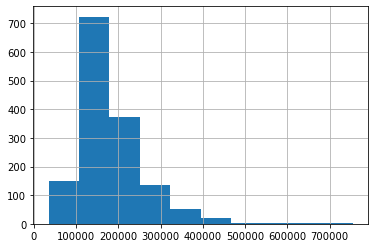

In [6]:
data.SalePrice.hist()

Plot the correlation matrix for all variables

In [7]:
data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.008931,-0.027549,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025219,-0.016947,...,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.021917
MSSubClass,0.008931,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,...,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284
LotFrontage,-0.027549,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,...,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917,0.351799
LotArea,-0.040746,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,...,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843
OverallQual,-0.029771,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,...,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
OverallCond,-0.002839,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,...,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.077856
YearBuilt,-0.016581,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,...,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897
YearRemodAdd,-0.050438,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,...,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101
MasVnrArea,-0.025219,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,...,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510,0.477493
BsmtFinSF1,-0.016947,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,...,0.223492,0.124163,-0.099712,0.050908,0.096823,0.084462,0.093295,-0.000942,0.022556,0.386420


Inspect missing values

In [8]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(35)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


Remove all columns (features) that have more than one missing value, but make sure to keep `SalePrice` feature since it's our target variable.

In [9]:
data_cleaned = data.drop((missing_data[missing_data['Total'] > 1]).index,1)

In [10]:
data_cleaned['SalePrice'] = data['SalePrice']

In [11]:
data_cleaned.columns

Index(['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

If there are any missing values left, remove the corresponding rows. Store the output data as `data_cleaned` dataframe.

In [12]:
data_cleaned = data_cleaned.dropna()

In [13]:
data_cleaned.isnull().sum().max() #just checking that there's no missing data missing...

0

Finally, convert all categorical variables into binary using `pd.get_dummies()`. This step is required to apply any machine learning models to the data.

In [14]:
data_with_dummies = pd.get_dummies(data_cleaned) 

## Step 3: Setting up the train, dev and test data.

First, create your input `X` and output `y` variables for regression.

In [15]:
X = data_with_dummies.drop(['SalePrice'], axis=1)
y = data_with_dummies['SalePrice']

In [16]:
X.shape

(1459, 205)

In [17]:
y.shape

(1459,)

Split your data into train, dev and test sets

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# We apply train_test_split twice to obtain the three train, dev and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2020)

Print out the shapes of the different datasets

In [20]:
X_train.shape

(1021, 205)

In [21]:
X_val.shape

(219, 205)

In [22]:
X_test.shape

(219, 205)

## Step 4: Building a baseline regression model.

In [23]:
from sklearn.linear_model import LinearRegression

Initialise a linear regression model.

In [24]:
lr = LinearRegression()

Fit the model to your training data.

In [25]:
lr.fit(X_train,y_train)

LinearRegression()

Evaluate the performance of the model on the training and the development dataset.

In [26]:
lr.score(X_train, y_train)

0.9286420997584361

In [27]:
lr.score(X_val, y_val) # returns R^2 of the prediction.

0.8819105153182563

Here is a task for you: discuss whether the model suffers from high bias, high variance or both. You don't need to answer the question right now, as you will get more insights after comparing different models.

## Step 5: Build a more complex model to reduce bias.

As introduced in Week 6 and 7, random forest is well-suited for supervised learning tasks. Here, you might want to try random forest regressor here.

In [28]:
from sklearn.ensemble import RandomForestRegressor

Initialise the random forest model with the default parameters (100 trees).

In [29]:
rf = RandomForestRegressor(n_estimators=100)

Fit the model to the training data.

In [30]:
rf.fit(X_train,y_train)

RandomForestRegressor()

Evaluate the performance of the model on the training and development (validation) datasets.

A good practice in coding is to read the documentation when you have questions. What is the score metric used by ```rf.score()```? Can you find it in the documentation? (Hint: it is the coefficient of documentation, R2).  

In [31]:
rf.score(X_train, y_train)

0.9790903515564542

In [32]:
rf.score(X_val, y_val)

0.8748799405620988

Note that random forest has a much lower bias than liner regression but still suffers from some variance.

## Step 6: Optimise hyperparameters of the ML model

Let's see if we can tune the model hyperparameters by maximising model performance on the development dataset. As discussed in the lecture, there are two ways of using development dataset:

1. Using predefined trainig and development set
2. Cross validation

We will demonstrate both ways in the following.

### Using predefined training and developement set

In ```sklearn```, there is no existing function to use predefined training and dev set for hyperparamter tuning. Therefore, we need to implement this method manually.

In [33]:
# number of trees to tune
no_trees = [10,20,30,40,50,70,100,150,200]

# process of tune the number of trees
max_score = 0
best_no_trees = None
for t in no_trees:
    m = RandomForestRegressor(n_estimators=t).fit(X_train,y_train)
    score = m.score(X_val, y_val)
    if score > max_score:
        max_score = score
        best_no_trees = t

Now, print out the optimal number of trees. Note that each time you run the above code cell, you may get a different ```best_no_trees``` but the ```max_score``` is quite similar across different runs. This is because the randomisation in creating ```RandomForestRegressor```.

In [34]:
max_score

0.876813842035836

In [35]:
best_no_trees

200

We can create the final random forest model using the optimal parameters.

In [36]:
rf_final = RandomForestRegressor(n_estimators=best_no_trees)
rf_final.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

After tuning the hyperparameters, we are able to evaluate the performance of the model to inspect bias and variance.

In [37]:
print('The score on the training data:')
print(rf_final.score(X_train, y_train))
print('The score on the development data:')
print(rf_final.score(X_val, y_val))

The score on the training data:
0.9819918697587275
The score on the development data:
0.8763277306933405


### Cross-validation

The second method for hyperparameter tuning is to use the ```GridSearchCV``` from ```sklearn```. We have used this function in the workshop for classification in Week 7. 

**This method is preferred over the first method in real-world machine learning projects.**

In [38]:
from sklearn import model_selection

# values of n_estimators
parameters = {'n_estimators':[10,20,30,40,50,70,100,150,200]}
rf = RandomForestRegressor()

clf = model_selection.GridSearchCV(rf, parameters)

clf.fit(X_train, y_train)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'n_estimators': 150}
The best score is: 
0.857742185399054


Sometimes, it is helpful to plot the influence of a single hyperparameter on the training and development score to find out whether the model is overfitting or underfitting. This plot is called **Validation curve**.

The function ```validation_score``` is helpful in this case. Similar to ```GridSearchCV```, this function is based on cross-validation.

In [39]:
import numpy as np
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

n_estimators_range = [10,20,30,40,50,70,100,150,200]

train_scores, valid_scores = validation_curve(estimator=RandomForestRegressor(), 
                                              X=X_train, y=y_train, 
                                              param_name="n_estimators",
                                              param_range=n_estimators_range,
                                              cv=5)

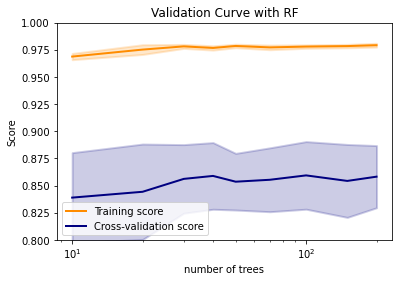

In [40]:
# plotting the validation curve
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with RF")
plt.xlabel(r"number of trees")
plt.ylabel("Score")
plt.ylim(0.8, 1.0)
lw = 2
plt.semilogx(n_estimators_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(n_estimators_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(n_estimators_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(n_estimators_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

It looks like the training and development scores do not change significantly with the number of trees, which means that the model is quite robust to this number of trees in the random forest.

You can pick up the point where the gap between training and cross-validation score reaches the minimum as the selected hyperparameter.

*Extension*: Try to optimise other hyperparameters as well, such as `max_depth`. You can achieve this by tweaking the definition of ```parameters``` in the above cell. You can also simultineously optimise multiple hyperparameters. The documentation of ```GridSearchCV``` is [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

As you may notice, there is still some variance in the model. As discussed in the lecture, several methods can be used to reduce variance, such as using more data or using simpler/smaller models. If you want to further reduce the variance, using more data is one direction to go.

## Step 7: Getting the final estimate of performance using the test set after model optimisation

Note that the test set should not be used in any stage of model training or tuning. It is used to report the model performance after the model has been finalised. That is, when people ask 'what is the performance of your machine learing model', you should tell them the model performance based on the test set.

In [41]:
rf_final.score(X_test, y_test)

0.8346396387396804

# Conclusions

In this workshop, we have practiced with analysing and tuning ML models for predicting house price. These techniques would be helpful for your future data science projects.

# References
- [Wikipedia: 'Bias-variance dilemma'](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)
- [Documentation of GridSearchCV in sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- [A post on validation curves](https://scikit-learn.org/stable/modules/learning_curve.html)